In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import pickle
import wind_power_bidding as wpb


In [2]:
# Load the forecast data
with open('InputData/Scenarios.pkl', 'rb') as file:
    data = pickle.load(file)
wind_forecast = data['wind_data_da']
spot_forecast = data['spot_prices']
imbalance_forecast = data['imbalance']
n1=1; n2=1; n3=1; n_scenarios = [n1,n2,n3]
print(np.shape(wind_forecast))
print(np.shape(spot_forecast))
print(np.shape(imbalance_forecast))

(24, 20)
(24, 20)
(24, 20)


In [3]:
wind_bids, prob= wpb.wind_pp_bidding(wind_forecast, spot_forecast, imbalance_forecast, n_scenarios, price_scheme='two_price')

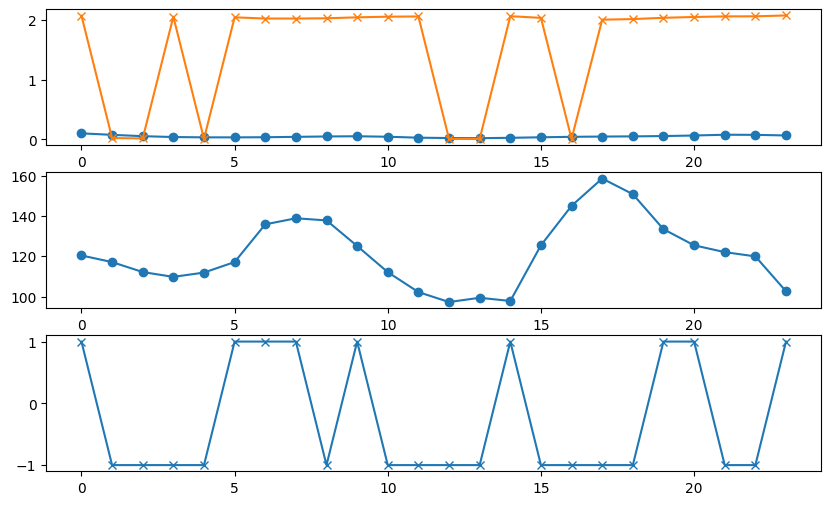

In [4]:
# Visualize the selected wind bids
plt.figure(figsize=(10, 6))
plt.subplot(311)
plt.plot(wind_forecast[:,:n2], label='Wind Forecast', marker='o')
plt.plot(wind_bids, label='Wind Bids', marker='x')
plt.subplot(312)
plt.plot(spot_forecast[:,:n1], label='Spot Prices', marker='o')
plt.subplot(313)
plt.plot(imbalance_forecast[:,n3], label='Imbalance Prices', marker='x')